### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

- [My Github Repo](https://github.com/heyashy/LSE_DA_COVID_analysis)
- Screenshot demo

!['My Github screenshot](https://github.com/heyashy/LSE_DA_COVID_analysis/blob/main/screenshot.jpg?raw=true)

---
### 1.2) The role of GitHub
<p>Git was developed by Linus Torvald, the creator of Linux, in 2005 and is a software that enables tracking for changes to a set of files and is a critial part of the development cycle of any application developed collaboratively by an orginsiation. Git's is essentialy a version control softrware that allows the tracking, commiting and merging of changes whilst maintaing speed, efficieny and transparency in the development cycle.</p>

<p>Git is a defacto standard and there are many options to allow it's implimentation</p>

- GitHub
- GitLab
- BitBucket
- Google Cloud Source Repositories
- Phabricator
- RhodeCode

are just some of the options that developers can use to impliment Git in thier projects. More information on Git can be found here on the Wikipedia page by [clicking here](https://en.wikipedia.org/wiki/Git).

---
### 2.1) Assignment 2: Import and explore the data

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={"figure.dpi":144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.color_palette("Set2")
sns.despine()

cov = pd.read_csv('./covid_19_uk_cases.csv')
vac = pd.read_csv('./covid_19_uk_vaccinated.csv')

<Figure size 921.6x691.2 with 0 Axes>

In [39]:
print('Shape: {} \n'.format(cov.shape))
print(cov.dtypes)

Shape: (7584, 12) 

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object


In [40]:
print('Shape: {} \n'.format(vac.shape))
print(vac.dtypes)

Shape: (7584, 11) 

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [41]:
# Date is an object and should be a datetime object
# Start by checking the head to see what format the data is in 
print(vac.head(1))
# Correct the format
vac["Date"] = pd.to_datetime(vac["Date"])
#Check
print(vac.dtypes)
print(vac.head(1))

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   

   Vaccinated  First Dose  Second Dose  
0           0           0            0  
Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
dtype: object
  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.220

In [42]:
print(cov.head(5))
print(cov.tail(5))
print(vac.head(5))
print(vac.tail(5))

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        

### Check for Nan values

In [43]:
cov.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

In [44]:
# Fix this
# We could make them all zero
# cov[cov.isna().any(axis=1)] = 0
# However we are going to fill them with mean values
cov['Deaths'].fillna(cov['Deaths'].mean(), inplace=True)
cov['Cases'].fillna(cov['Cases'].mean(), inplace=True)
cov['Recovered'].fillna(cov['Recovered'].mean(), inplace=True)

print(cov.isna().sum())

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                2
dtype: int64


In [45]:
vac.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

In [46]:
gcov_df = cov[cov['Province/State'] == 'Gibraltar']

In [47]:
pd.set_option("display.max_rows", None)
# gcov_df 
gcov_df.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object

In [48]:
gcov_df = gcov_df[['Date', 'Deaths', 'Cases', 'Recovered', 'Hospitalised']]

In [122]:
gcov_df.tail()

,Date,Deaths,Cases,Recovered,Hospitalised
4419,2021-10-10,97.0,5626.0,0.0,858.0
4420,2021-10-11,97.0,5655.0,0.0,876.0
4421,2021-10-12,97.0,5682.0,0.0,876.0
4422,2021-10-13,97.0,5707.0,0.0,0.0
4423,2021-10-14,97.0,5727.0,0.0,0.0


In [50]:
gcov_df.describe(datetime_is_numeric=True).apply(lambda x: x.round(0))

,Deaths,Cases,Recovered,Hospitalised
count,632.0,632.0,632.0,632.0
mean,40.0,2237.0,1513.0,1028.0
std,45.0,2136.0,1817.0,1146.0
min,0.0,0.0,0.0,0.0
25%,0.0,177.0,110.0,158.0
50%,5.0,1036.0,324.0,676.0
75%,94.0,4286.0,4122.0,1548.0
max,97.0,5727.0,4670.0,4907.0


In [123]:
print("start date: {} / End Date: {}".format(gcov_df['Date'].min(),gcov_df['Date'].max()))


start date: 2020-01-22 / End Date: 2021-10-14


[Text(0.5, 0, 'Time')]

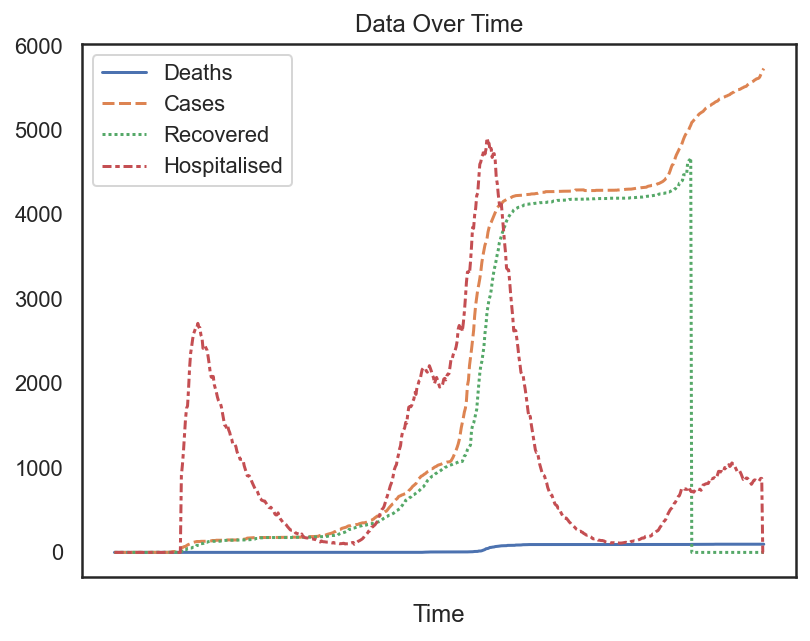

In [141]:

sns.set_theme(style="white")
ax =  sns.lineplot(data=gcov_df)
ax.set(xticklabels=[])  
ax.set(title='Data Over Time')
ax.set(xlabel='Time')
#ax.tick_params(bottom=False) 


#

# Initial findings
From the above chart we can extrapulate:
- Our data set has the following dates - Start date: 2020-01-22 / End Date: 2021-10-14
- There were disproportionate hospitalisations at the start of the data set
- Hospitilisations don't mimic cases. We should look into this more
- Deats are relatively low
- Recvoered cases closley follow reported cases but suddenly fall off in a sharp drop. This should be looked into further